# Introduction

__The Given Dataset Contains the Infomration about the Passengers Present in the Titanic . Note that while it does not contain the full Information of all the Passengers, the present dataset is large enough to correctly analyze and accurately predict the intresting question brought out by the Dataset.In this we will attempt to Answer question two of the Intresting Questions__

# The Questions that we will xplore in them are

-   #### Which Sex is more Likely to Survive?
     A Common question which is made all the more intresting Considering the womans and children are rescued first by lifeboat
-   #### Depedence of Age on Survivability 
     Its intresting to Analyze how the age affects the Chances of Survival and does age have any role

#### Parameters
survival----->Survival	          ( 0 = No, 1 = Yes)

pclass------>	Ticket class	   (1 = 1st, 2 = 2nd, 3 = 3rd)

sex---->	Sex	
Age---->	Age in years	
sibsp---->	# of siblings / spouses aboard the Titanic	
parch----->	# of parents / children aboard the Titanic	
ticket---->	Ticket number	
fare---->	Passenger fare	
cabin---->	Cabin number	
embarked---->	Port of Embarkation



## Question 1

In [1]:
import numpy as np
import pandas as pd


In [2]:
RdCsv=pd.read_csv('titanic-data (1).csv')

In [3]:
RdCsv.head(5)   #Exploring data set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
RdCsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


__Dropping the Rows of Children who are below the age of 12 as they are rescued first in the Lifeboat along with the womens__

In [5]:
RdCsv_AgeFilter=RdCsv[RdCsv['Age']>12]  #Dropping below the age of 12

## Why am I droping the persons with age less than 12?

-  ### Apparently There is A code of Conduct dating back from 18 century that womeen and children need to be rescued first.From the WIKIPEDIA article-
__Women and children first" is a code of conduct dating from 1852, whereby the lives of women and children were to be saved first in a life-threatening situation, typically abandoning ship, when survival resources such as lifeboats were limited. More information about it can be found at https://en.wikipedia.org/wiki/Women_and_children_first ___

- ### Within the Titanic context the same Code of conduct was applied where the Captain took the Code of conduct to a whole new level. From the PremiereExhibition Article
__Second Officer Lightoller, who was in charge of launching the lifeboats on the port side, took the order literally, and would not allow any men in the lifeboats regardless of any vacancies available. By the time Titanic eventually sank at 2:20 a.m., all of the lifeboats had launched, and there were still some 1,500 people on board the doomed ship. Of the 2,228 passengers and crew, 531 were either women or children and they made up a staggering proportion of the 706 saved passengers demonstrating the effect of the order “women and children first. More Information can be found at http://www.premierexhibitions.com/exhibitions/3/3/titanic-artifact-exhibition/blog/truth-behind-women-and-children-first __

- ### The childrens are survived regardless of sex and to minimize the effect of it in the analysis i am in support of dropping the data less than 12

In [6]:
Total_males=len(RdCsv_AgeFilter[RdCsv_AgeFilter['Sex']=='male']) #Calculating Total Males

In [7]:
Total_males

416

In [8]:
Total_Females=len(RdCsv_AgeFilter[RdCsv_AgeFilter['Sex']=='female'])  #Calculating females

In [9]:
Total_Females

229

In [10]:
Males_Survived=len(RdCsv_AgeFilter[(RdCsv_AgeFilter['Sex']=='male') & (RdCsv_AgeFilter['Survived']==1)])

In [11]:
Female_Survived=len(RdCsv_AgeFilter[(RdCsv_AgeFilter['Sex']=='female') & (RdCsv_AgeFilter['Survived']==1)])

In [12]:
Female_Survived        #Calculating the no of Female Survived

178

In [13]:
Males_Survived     #Calculating the no of Male Survived

72

In [14]:
Ratio_Males=Males_Survived/Total_males       #Finding the ratio male Survived

In [15]:
Ratio_Females=Female_Survived/Total_Females    #Finding the ratio female Survived

In [16]:
Ratio_Males

0.17307692307692307

In [17]:
Ratio_Females

0.777292576419214

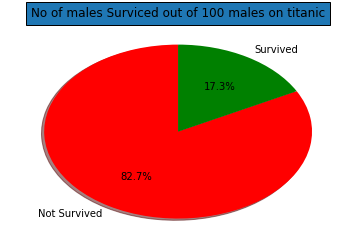

In [18]:
%matplotlib inline                     
import matplotlib.pyplot as pit
labels = 'Not Survived', 'Survived';
sizes = [1-Ratio_Males, Ratio_Males]
colors = ['Red','Green']
 
# Plot

pit.pie(sizes,labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
pit.title('No of males Surviced out of 100 males on titanic',bbox={'pad':5})

#Plotting the ratio of male Survivability

__Above Plot shows the probality of no of male survivors per 100 male people in Titanic__

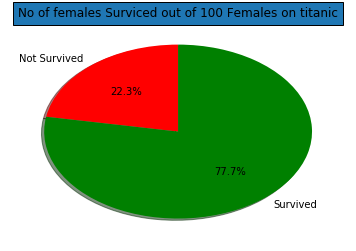

In [23]:
labels = 'Not Survived', 'Survived';          ##Plotting the ratio of females Survivability
sizes = [1-Ratio_Females, Ratio_Females] 
colors = ['Red','Green']
 
# Plot

pit.pie(sizes,labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
pit.title('No of females Surviced out of 100 Females on titanic',bbox={'pad':5})

__Above Plot shows the probality of no of female survivors per 100 female people in Titanic__

__We Concluded that Women did have a better chance of survival as we they did Have propotionally better survivability ratio than males counterpart__

## Question 2

In [24]:
RdCsv.head(5)   #Exploring data set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
RdCsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


__We Find that 100 People didnt have age in the dataset. Hence we need to find to fill the missing Value__

In [26]:
Age_Survived_Table=RdCsv[['Age','Survived']]      #Grabbing the Age and Survived Coloumn of the Dataset

In [27]:
Age_Survived_Table

,Age,Survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0
5,NaN,0
6,54.0,0
7,2.0,0
8,27.0,1
9,14.0,1


*** Grabbing the Age and Survived Table from the Data Set ***

In [29]:
Age_Survived_Table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
Age         714 non-null float64
Survived    891 non-null int64
dtypes: float64(1), int64(1)
memory usage: 14.0 KB


__To Fill in the missing Value we will use the z Test to normalize the Age Data Set. Secondly we will Fill the Missing Age Value within the Standard deviation or within z score of 1 from the avaiaible dataset. Thirdly we will Convert z score back to Age to Produce the Standarized Age Table__ 

__Why we will Fill the missing value within one standard Deviation?__


__By Doing it we will Fill in the Missing value with 68 percent Confidence Interval. ie The value that we are filling has the property that it will have a probality of 68 percent chance of choosing it from a seeming random sample__

In [30]:
Mean_Rest=Age_Survived_Table.dropna().mean()['Age']   #Calculating the Mean of data of Available Data Set

In [31]:
Mean_Rest

29.69911764705882

In [32]:
Std_Rest=Age_Survived_Table.dropna().std()['Age']     # #Calculating the Standard Deviation of data of Available Data Set


#Finding the Standard Distribution of the Avaiabaible Age Data

In [33]:
Std_Rest

14.526497332334044

In [35]:
def Normalizing_out(x):                        #Normalizing the Age Table (Calculating the z score of each age value)
   return (x-Mean_Rest)/Std_Rest

Normailzed_Age=Age_Survived_Table['Age'].apply(Normalizing_out)
Normailzed_Age

0     -0.530005
1      0.571430
2     -0.254646
3      0.364911
4      0.364911
5           NaN
6      1.672866
7     -1.906799
8     -0.185807
9     -1.080723
10    -1.769120
11     1.948225
12    -0.667685
13     0.640270
14    -1.080723
15     1.741706
16    -1.906799
17          NaN
18     0.089552
19          NaN
20     0.364911
21     0.296072
22    -1.011883
23    -0.116967
24    -1.493761
25     0.571430
26          NaN
27    -0.736524
28          NaN
29          NaN
         ...   
861   -0.598845
862    1.259828
863         NaN
864   -0.392326
865    0.846789
866   -0.185807
867    0.089552
868         NaN
869   -1.769120
870   -0.254646
871    1.190988
872    0.227232
873    1.190988
874   -0.116967
875   -1.011883
876   -0.667685
877   -0.736524
878         NaN
879    1.810545
880   -0.323486
881    0.227232
882   -0.530005
883   -0.116967
884   -0.323486
885    0.640270
886   -0.185807
887   -0.736524
888         NaN
889   -0.254646
890    0.158392
Name: Age, Length: 891, 

In [38]:
Age_Survived_Table['Normalized_Age']=Normailzed_Age

C:\Users\yashg\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
Age_Survived_Table

,Age,Survived,Normalized_Age
0,22.0,0,-0.530005
1,38.0,1,0.571430
2,26.0,1,-0.254646
3,35.0,1,0.364911
4,35.0,0,0.364911
5,NaN,0,NaN
6,54.0,0,1.672866
7,2.0,0,-1.906799
8,27.0,1,-0.185807
9,14.0,1,-1.080723


*** Above table Shows the Age of each Paassenger to its corresponding z Score ***

In [40]:
import numpy as np
np.random.normal(0,1)            #The Function Randomly grabs a Value within the Standard deviation of 1 Normaly Distributed
                             # (value -1 to 1)

0.17812921221536368

In [41]:
def Adding_Value(x):           
    if pd.isnull(x):
      return np.random.normal(0,1)
    else:
        return x


Normailzed_Age_Fill=Age_Survived_Table['Normalized_Age'].apply(Adding_Value)



__  The above function fills the Missing Value from Normal Distribution with mean =0 and std=1 (Normally Distributed)__

In [42]:
Age_Survived_Table['Normailzed_Age_Fill']=Normailzed_Age_Fill

C:\Users\yashg\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [43]:
Age_Survived_Table

,Age,Survived,Normalized_Age,Normailzed_Age_Fill
0,22.0,0,-0.530005,-0.530005
1,38.0,1,0.571430,0.571430
2,26.0,1,-0.254646,-0.254646
3,35.0,1,0.364911,0.364911
4,35.0,0,0.364911,0.364911
5,NaN,0,NaN,1.774637
6,54.0,0,1.672866,1.672866
7,2.0,0,-1.906799,-1.906799
8,27.0,1,-0.185807,-0.185807
9,14.0,1,-1.080723,-1.080723


*** The above table Shows that Corresponding Missing age value has been filled with the normalized Value ***

In [44]:
def Corrected_Age(x):
    return (x*Std_Rest)+Mean_Rest


Corrected_Age=Age_Survived_Table['Normailzed_Age_Fill'].apply(Corrected_Age)




__  The above function calculates The original Age back and the age of the Random Filled Missing value from z Score__

In [45]:
Age_Survived_Table['Corrected_Age']=Corrected_Age

C:\Users\yashg\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [135]:
Age_Survived_Table

,Age,Survived,Normalized_Age,Normailzed_Age_Fill,Corrected_Age
0,22.0,0,-0.530005,-0.530005,22.000000
1,38.0,1,0.571430,0.571430,38.000000
2,26.0,1,-0.254646,-0.254646,26.000000
3,35.0,1,0.364911,0.364911,35.000000
4,35.0,0,0.364911,0.364911,35.000000
5,NaN,0,NaN,-0.672320,19.932659
6,54.0,0,1.672866,1.672866,54.000000
7,2.0,0,-1.906799,-1.906799,2.000000
8,27.0,1,-0.185807,-0.185807,27.000000
9,14.0,1,-1.080723,-1.080723,14.000000


*** The above Table has the addition of one column which shows each corresponding z score has Been converted back to age with the addition of new age filled value in place of Nan ***

In [47]:
Corrected_Age_Floored=Age_Survived_Table['Corrected_Age'].apply(np.floor)
#Since the Age cannot be negative Truncating the Decinmal Point

In [50]:
Age_Survived_Table['Corrected_Age_Floored']=Corrected_Age_Floored

C:\Users\yashg\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [52]:
Age_Survived_Table

,Age,Survived,Normalized_Age,Normailzed_Age_Fill,Corrected_Age,Corrected_Age_Floored
0,22.0,0,-0.530005,-0.530005,22.000000,22.0
1,38.0,1,0.571430,0.571430,38.000000,38.0
2,26.0,1,-0.254646,-0.254646,26.000000,26.0
3,35.0,1,0.364911,0.364911,35.000000,35.0
4,35.0,0,0.364911,0.364911,35.000000,35.0
5,NaN,0,NaN,1.774637,55.478376,55.0
6,54.0,0,1.672866,1.672866,54.000000,54.0
7,2.0,0,-1.906799,-1.906799,2.000000,2.0
8,27.0,1,-0.185807,-0.185807,27.000000,27.0
9,14.0,1,-1.080723,-1.080723,14.000000,14.0


*** Flooring the age values to integer since they cant be in decimal ***

__Since We have Our original Table Back We can now Finally Find the Correlation__

In [81]:
Survived=Age_Survived_Table['Survived']
Corrected_Age_Floor=Age_Survived_Table['Corrected_Age_Floored']

In [84]:
Final_Table=pd.DataFrame([Survived,Corrected_Age_Floor]).transpose()

In [85]:
Final_Table

,Survived,Corrected_Age_Floored
0,Died,22
1,Survived,38
2,Survived,26
3,Survived,35
4,Died,35
5,Died,55
6,Died,54
7,Died,2
8,Survived,27
9,Survived,14


___ Prepping the Table for the Plot( Stripplot) ___

In [92]:
Final_Table.columns=['Status','Age']

***Renaming the Coloumns to correctly Reflect the Axes what it will show***

In [98]:
Age_Survived_Table[['Survived','Corrected_Age_Floored']].corr()

,Survived,Corrected_Age_Floored
Survived,1.000000,-0.061308
Corrected_Age_Floored,-0.061308,1.000000


__Correlation calculates the mutual relationship or connection between two or more things__

__ A negative Correlation Means with increasing Age the chances of Survival is slim.  the Correlation value is small negative Value inching towards 0__

__ A corrlation of -0.06 is effectively no Correlation at all and thus we cannot accuratelt predict if Chances of Survival effects with age __

In [94]:
Age_Survived_Table['Survived'].replace({0:'Died',1:'Survived'}, inplace=True)

C:\Users\yashg\Anaconda3\lib\site-packages\pandas\core\generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [95]:
import seaborn as sns
sns.set(style='whitegrid',color_codes=True)

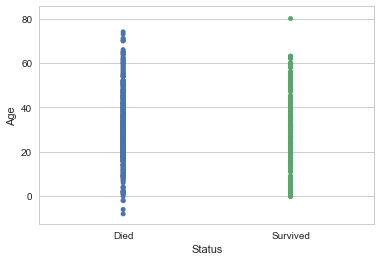

In [96]:
sns.stripplot(x='Status',y='Age',data=Final_Table)

*** The above plot shows the Distribution of age vs wether the person Survived or died via stripplot***

*** Fron the above we can See how there is no definate Age Group in which people More or less Survived in comparision to other age group. The vertically straight line is almost equal in both the cases ***

__ No definate Relation can be Understood from StripPlot which is the evidence of no correlation __

# Conclusion

### The Findings Were

-   #### Female definately had a better chance of Survival than males Counterparrt
-   #### No definte Relation Can be formed between the Depedency of survival with age (Although it indicate survival slims with 
    age)
    

### The Limitations Were
-   #### Although Appropriate Dataset is Availaible This dataset is only a larger part of much Bigger Dataset which would have made analysis more accurate
-   #### Lots of Missing Value particularly with age requires Stastical Methods to fill the Age which is always less accurate than the Real data


### Extra Thoughts
-     #### The data could have been further explored By finding the depedency of class with Survivabilty and how much Rich People survived better than Low class persons